<a href="https://colab.research.google.com/github/Minsung-commit/TIL/blob/master/LGbm_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
df = pd.read_csv('./seoul_5.csv')

In [ ]:
df.head()

,gu_l,dong_l,used_y,square,per_cost_man,Price per squar,floor,top10,YN_r,YN_top10,s_c,Hospital,cost
0,0,8,32,77.75,1922.829582,2122.127392,7,0,1,1,1,0.0,149500
1,0,8,33,54.98,2619.134231,2122.127392,7,0,1,1,1,0.0,144000
2,0,8,33,79.97,2035.138177,2122.127392,7,0,1,1,1,0.0,162750
3,0,8,33,79.97,2000.750281,2122.127392,8,0,1,1,1,0.0,160000
4,0,8,33,79.97,1875.703389,2122.127392,5,0,1,1,1,0.0,150000


In [ ]:
X = df.drop(['cost'], axis = 1)
y = df['cost']
robustScaler = RobustScaler()
print(robustScaler.fit(X))
X = robustScaler.transform(X)

# define the transform
trans = PCA(n_components=10)

# transform the data
X_dim = trans.fit_transform(X)

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)


In [ ]:
cumsum = np.cumsum(trans.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print('선택할 차원 수 :', d)

선택할 차원 수 : 10


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dim, y,
                                                   test_size = 0.2,
                                                   random_state = 99)

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
%time
lgb = LGBMRegressor(linear_tree = True,
                   boosting_type = 'gbdt',
                   objective = 'regression',
                   n_estimators = 15000,
                   learning_rate = 0.001,
                   max_depth = 6,
                   n_jobs = -1,
                    num_leaves = 144)

lgb.fit(X_train, y_train)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


In [ ]:
MSE = mean_squared_error(y_test, lgb.predict(X_test))

In [ ]:
from math import sqrt
print(f'MSE : {MSE}')
print(f'RMSE : {sqrt(MSE)}')

MSE : 13749334.794905465
RMSE : 3708.0095462263125


In [ ]:
from math import sqrt
print(f'MSE : {MSE}')
print(f'RMSE : {sqrt(MSE)}')

MSE : 1829758.059959414
RMSE : 1352.6854992789026


In [ ]:
import lightgbm as lgb1
train_ds = lgb1.Dataset(X_train, label=y_train)
test_ds = lgb1.Dataset(X_test, y_test)
params = {'learning_rate': 0.1,
          'max_depth': 10,
          'boosting':'gbdt',
          'objective':'regression',
          'metric':'rmse',
          'is_training_metric':True,
          'num_leaves':256,
          'feature_fraction':0.7,
          'bagging_fraction':0.9,
          'baggin_freq':5,
          'seed':2020}

In [ ]:
model = lgb1.train(params, train_ds, 15000, test_ds, verbose_eval=100, early_stopping_rounds=100)
y_pred = model.predict(X_test)

In [ ]:
lgb.feature_importances_

array([   88,   566,  3361, 62039, 58621,  1239,  1521,    51,   168,
          78,   483,     0], dtype=int32)

In [ ]:
X.columns

Index(['gu_l', 'dong_l', 'used_y', 'square', 'per_cost_man', 'Price per squar',
       'floor', 'top10', 'YN_r', 'YN_top10', 's_c', 'Hospital'],
      dtype='object')

/home/ubuntu/anaconda3/envs/multi/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 700x500 with 0 Axes>

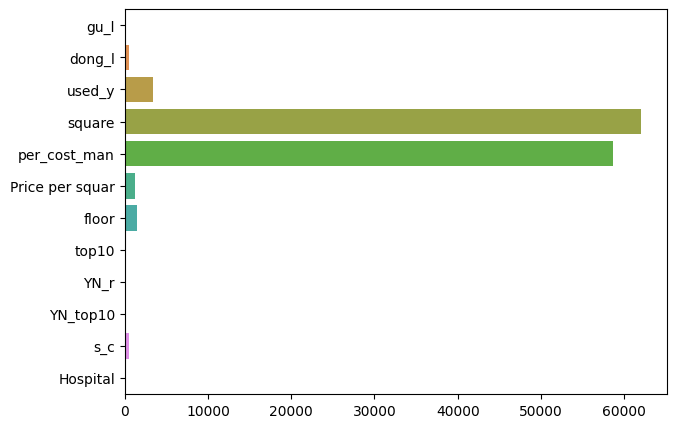

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(lgb.feature_importances_,['gu_l', 'dong_l', 'used_y', 'square', 'per_cost_man', 'Price per squar',
       'floor', 'top10', 'YN_r', 'YN_top10', 's_c', 'Hospital'])
plt.show()

In [ ]:
lgb.predict(X_test)

array([61653.34578109, 95385.1443382 , 13022.96341205, ...,
       64174.72556671, 30008.49168428, 53337.2565952 ])

In [ ]:
import joblib

joblib.dump(lgb, 'lgb_model.pkl')

['lgb_model.pkl']

In [ ]:
lgb_from_joblib = joblib.load('lgb_model.pkl') 
lgb_from_joblib.predict(X_test)

array([61653.34578109, 95385.1443382 , 13022.96341205, ...,
       64174.72556671, 30008.49168428, 53337.2565952 ])

## 하위 2개 변수 삭제 후 다시 모델링
- 별 차이 없음..

In [ ]:
df_1 = df.drop(['top10', 'Hospital'], axis=1)

In [ ]:
df_1.head(1)

,gu_l,dong_l,used_y,square,per_cost_man,Price per squar,floor,YN_r,YN_top10,s_c,cost
0,0,8,32,77.75,1922.829582,2122.127392,7,1,1,1,149500


In [ ]:
X = df_1.drop(['cost'], axis = 1)
y = df_1['cost']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   random_state = 99)

In [ ]:
%time
lgb = LGBMRegressor(linear_tree = True,
                   boosting_type = 'gbdt',
                   objective = 'regression',
                   n_estimators = 9000,
                   learning_rate = 0.001,
                   max_depth = 4,
                   n_jobs = -1)

lgb.fit(X_train, y_train)

MSE = mean_squared_error(y_test, lgb.predict(X_test))
print(f'MSE : {MSE}')
print(f'RMSE : {sqrt(MSE)}')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
MSE : 1830351.8187582497
RMSE : 1352.9049555524032


In [ ]:
lgb.feature_importances_

array([  103,   567,  3362, 62127, 58549,  1258,  1527,   169,    78,
         483], dtype=int32)

## feature_importances 기준 200 밑의 변수들 삭제 후 다시 모델링

- 별 차이 없다..

In [ ]:
df_2 = df.drop(['top10', 'Hospital','gu_l','YN_r','YN_top10'], axis=1)

In [ ]:
df_2.head(1)

,dong_l,used_y,square,per_cost_man,Price per squar,floor,s_c,cost
0,8,32,77.75,1922.829582,2122.127392,7,1,149500


In [ ]:
X = df_2.drop(['cost'], axis = 1)
y = df_2['cost']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   random_state = 99)

In [ ]:
%time
lgb = LGBMRegressor(linear_tree = True,
                   boosting_type = 'gbdt',
                   objective = 'regression',
                   n_estimators = 9000,
                   learning_rate = 0.001,
                   max_depth = 4,
                   n_jobs = -1)

lgb.fit(X_train, y_train)

MSE = mean_squared_error(y_test, lgb.predict(X_test))
print(f'MSE : {MSE}')
print(f'RMSE : {sqrt(MSE)}')

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs
MSE : 1837465.7173544266
RMSE : 1355.5315257692928


## 하이퍼 파라미터 튜닝

- 특성 선택에 별 영향이 없으므로 파라미터를 튜닝해서 다시 모델링

In [ ]:
# 하이퍼 파라미터 튜닝
%time
from sklearn.model_selection import GridSearchCV

params = {
    'learning_rate' : [0.1, 0.01, 0.001, 0.0001],
    'max_depth' : [1,2,3,4,5,6,7,8,9,10],
    'num_leaves':[64,128,144,256]
}

grid_cv = GridSearchCV(lgb, param_grid = params, cv=4, scoring='neg_mean_squared_error', verbose=1, device='gpu')
grid_cv.fit(X_train, y_train)

In [ ]:
print(f'최적의 하이퍼 파라미터 : {grid_cv.best_params_}')
print(f'예측 오차 : {grid_cv.best_score_}')

In [ ]:
X = df.drop(['cost'], axis = 1)
y = df['cost']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   random_state = 99)

In [ ]:
%time
lgb_r = LGBMRegressor(linear_tree = True,
                   boosting_type = 'gbdt',
                   objective = 'regression',
                   n_estimators = 9000,
                   learning_rate = 0.1,
                   max_depth = 4,
                   n_jobs = -1)

lgb_r.fit(X_train, y_train)

In [ ]:
MSE = mean_squared_error(y_test, lgb_r.predict(X_test))

In [ ]:
print(f'MSE : {MSE}')
print(f'RMSE : {sqrt(MSE)}')

In [ ]:
lgb_r.feature_importances_

In [ ]:
X.columns

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(lgb_r.feature_importances_,['gu_l', 'dong_l', 'used_y', 'square', 'per_cost_man', 'Price per squar',
       'floor', 'top10', 'YN_r', 'YN_top10', 's_c', 'Hospital'])
plt.show()

In [ ]:
pred = lgb_r.predict(X_test)

In [ ]:
pred

In [ ]:
pred[0]

In [ ]:
y_test.iloc[0]

In [ ]:
joblib.dump(lgb_r, 'lgb_model_re.pkl')

In [ ]:
lgb_re_from_joblib = joblib.load('lgb_model_re.pkl') 
lgb_re_from_joblib.predict(X_test)